In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scvelo as scv
import scipy as sc
import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats

In [2]:
adata = ad.read('../data/processed/mus_musculus_preprocessed_all_params.h5ad')
adata.var.columns

Index(['Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57',
       'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast',
       'ratio_sum_allele_c57', 'ratio_sum_allele_cast',
       'ratio_mean_allele_c57', 'ratio_mean_allele_cast',
       'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value',
       'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot',
       'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma',
       'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood',
       'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s',
       'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'c57_kon',
       'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn',
       'total_kon', 'total_koff', 'total_ksyn', 'spliced_kon', 'spliced_koff',
       'spliced_ksyn', 'unspliced_kon', 'unspliced_koff', 'unspliced_ksyn',
       'total_s_u_kon', 'total_s_u_koff', 'total_s_u_k

In [41]:
c57 = adata.to_df('allele_c57').transpose()
cast = adata.to_df('allele_cast').transpose()

In [7]:
adata.layers

Layers with keys: Ms, Mu, allele_c57, allele_cast, ambiguous, fit_t, fit_tau, fit_tau_, matrix, ratio_allele_c57, ratio_allele_cast, spanning, spliced, total, unspliced, unspliced_by_total, velocity, velocity_u

In [28]:
p_list = []
x, y = adata.shape
for n in range(0, y):
    a = np.array(adata.layers['spliced'].todense())[:, n]
    b = np.array(adata.layers['unspliced'].todense())[:, n]
    
    ks_test = stats.ks_2samp(a, b)
    p_list.append(ks_test[1])
    
adata.var['p_value'] = p_list
        

<AxesSubplot:ylabel='Density'>

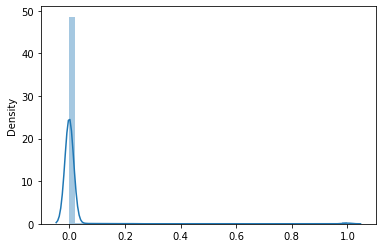

In [30]:
sns.distplot(p_list)

In [31]:
np.max(p_list)

1.0

In [32]:
np.min(p_list)

0.0

In [67]:
df = adata.var[(adata.var['p_value'] == 1)]
df

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,unspliced_kon,unspliced_koff,unspliced_ksyn,total_s_u_kon,total_s_u_koff,total_s_u_ksyn,unspliced_by_total_kon,unspliced_by_total_koff,unspliced_by_total_ksyn,p_value
Gene,,,,,,,,,,,,,,,,,,,,,
Snord89,ENSMUSG00000077704,1,39548854,39548745,-,433.0,508.0,0.460149,0.539851,116.001513,...,0.001000,156.828722,1.000000,0.001000,156.828722,1.000000,0.001,156.828722,1.0,1.0
Chml,ENSMUSG00000078185,1,175688353,175686488,-,839.0,928.0,0.474816,0.525184,221.417691,...,0.001000,156.828722,1.000000,0.001000,156.828722,1.000000,0.001,156.828722,1.0,1.0
Dnm3os,ENSMUSG00000078190,1,162225550,162217623,+,2559.0,2274.0,0.529485,0.470515,356.128562,...,0.001000,156.828722,1.000000,0.001000,156.828722,1.000000,0.001,156.828722,1.0,1.0
Mir763,ENSMUSG00000076448,10,120448110,120447991,-,26123.0,27661.0,0.485702,0.514298,332.351426,...,0.001000,156.828722,1.000000,0.001000,156.828722,1.000000,0.001,156.828722,1.0,1.0
Tspyl4,ENSMUSG00000039485,10,34301308,34297421,+,19208.0,18874.0,0.504385,0.495615,340.642870,...,0.001000,156.828722,1.000000,0.001000,156.828722,1.000000,0.001,156.828722,1.0,1.0
AK010878,ENSMUSG00000041716,12,102758672,102741732,-,1275.0,1436.0,0.470306,0.529694,296.586542,...,0.001000,156.828722,1.000000,0.002077,0.870077,15.421079,0.001,156.828722,1.0,1.0
Lpar6,ENSMUSG00000033446,14,73240358,73237891,+,4767.0,2997.0,0.613988,0.386012,414.649466,...,0.001000,156.828722,1.000000,0.001000,156.828722,1.000000,0.001,156.828722,1.0,1.0
B930095G15Rik,ENSMUSG00000085133,14,121251497,121248706,+,3551.0,4173.0,0.459736,0.540264,299.108043,...,0.001000,156.828722,1.000000,0.001000,156.828722,1.000000,0.001,156.828722,1.0,1.0
Gm2862,ENSMUSG00000089639,15,25682125,25681798,+,9132.0,10087.0,0.475155,0.524845,321.030460,...,0.001000,156.828722,1.000000,0.001000,156.828722,1.000000,0.001,156.828722,1.0,1.0


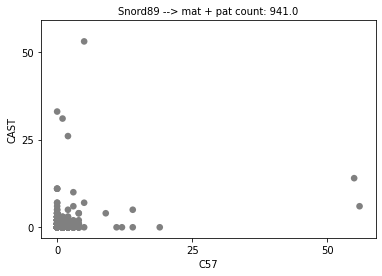

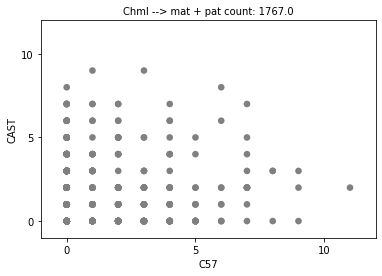

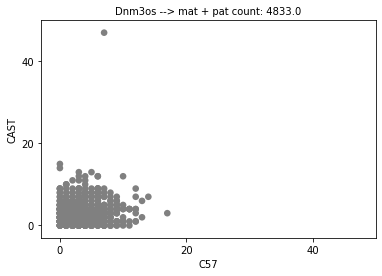

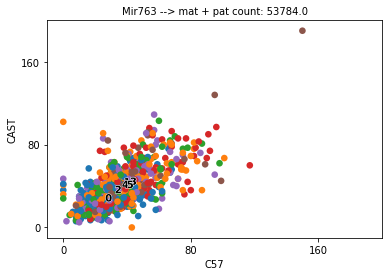

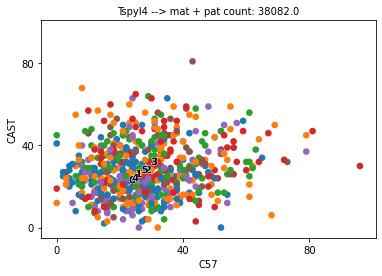

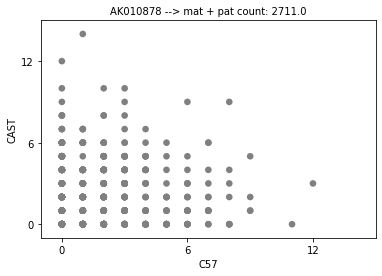

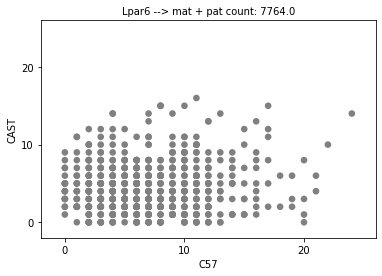

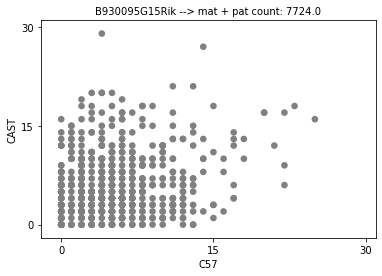

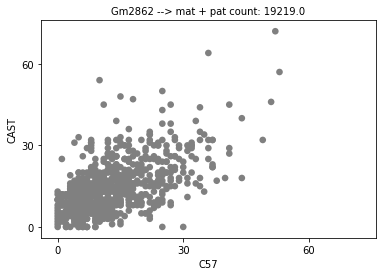

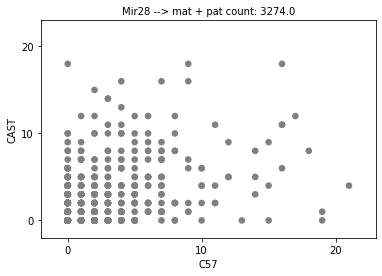

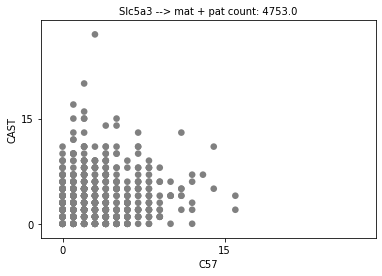

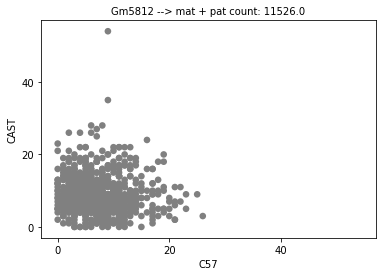

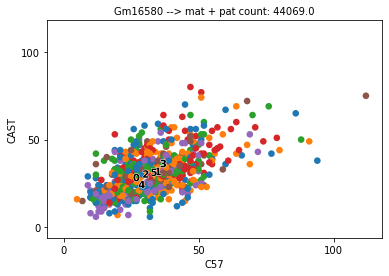

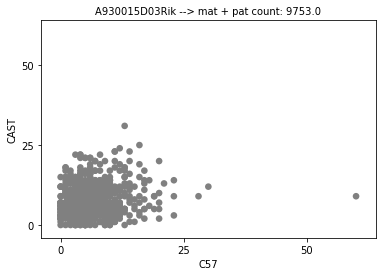

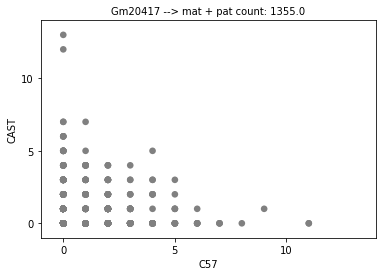

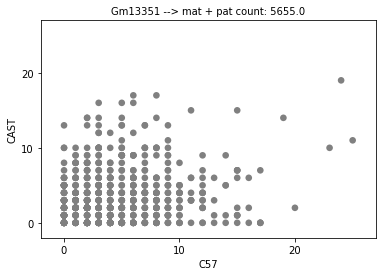

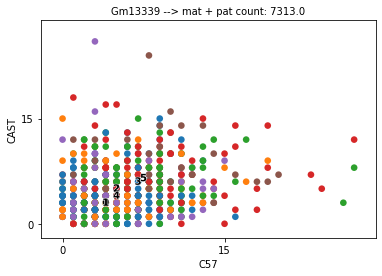

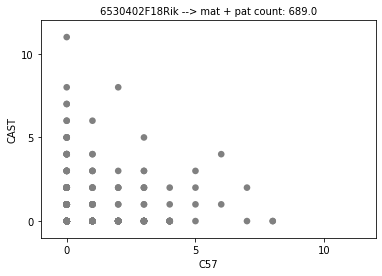

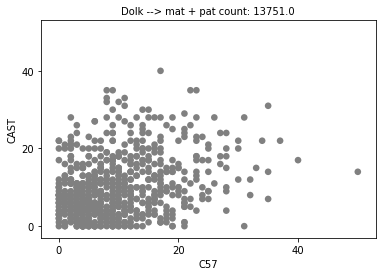

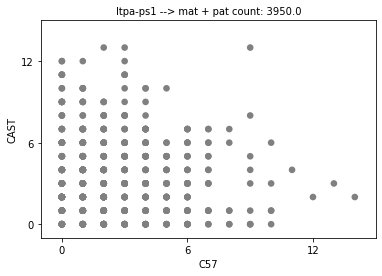

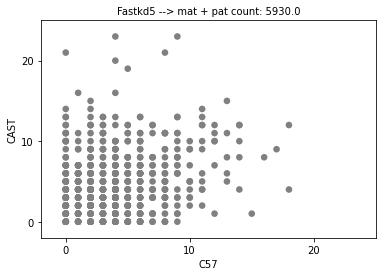

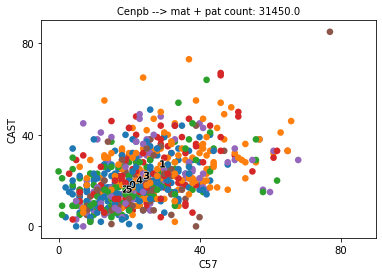

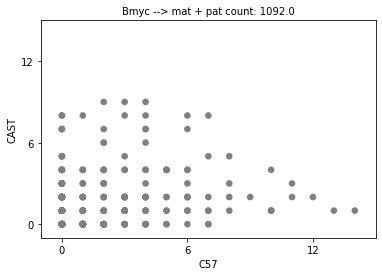

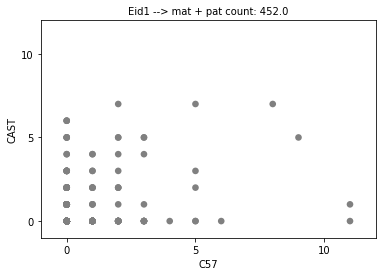

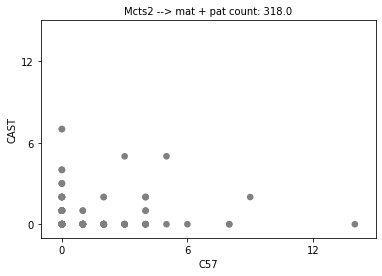

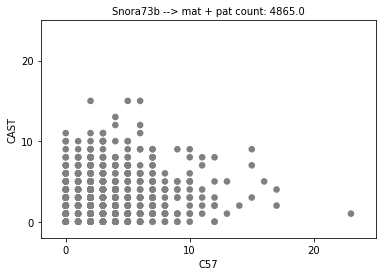

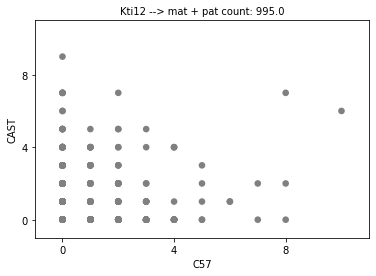

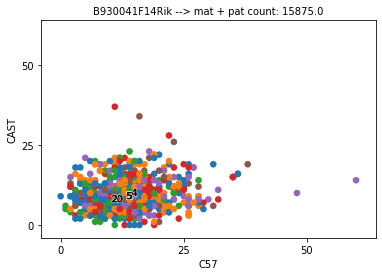

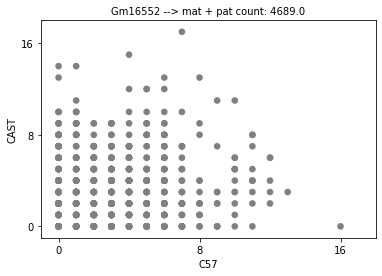

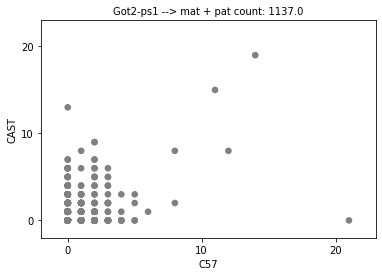

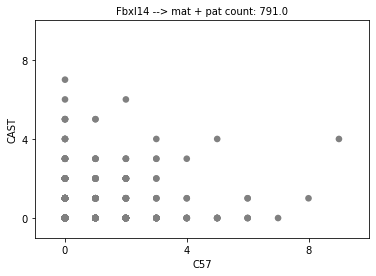

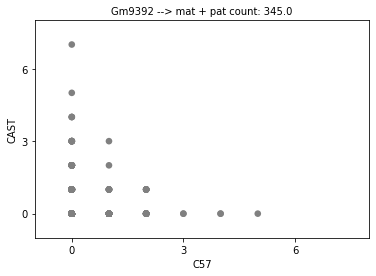

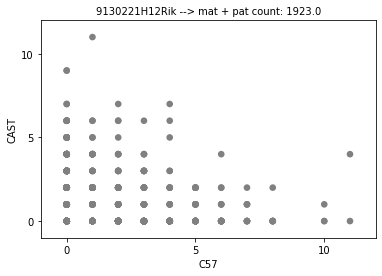

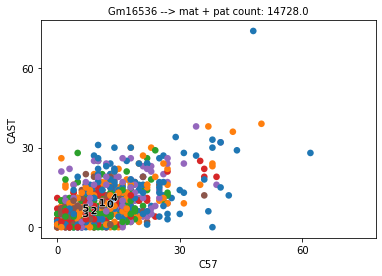

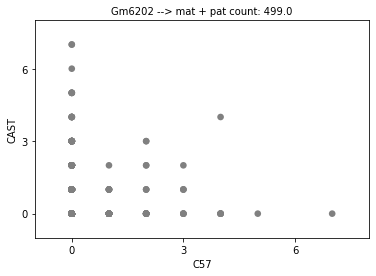

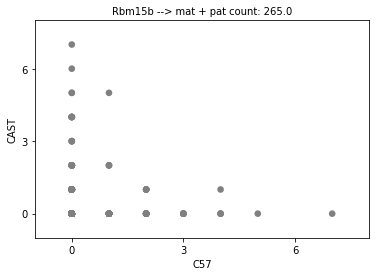

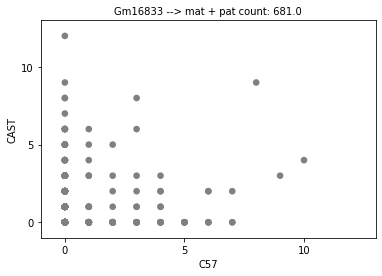

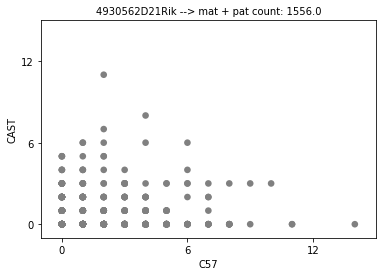

In [68]:
for x in df.index:
    mat_c57 = c57.loc[x][pd.notnull(c57.loc[x])]
    pat_cast = cast.loc[x][pd.notnull(cast.loc[x])]
    
    total_counts = np.sum(mat_c57) + np.sum(pat_cast)
    
    max_c57 = np.max(mat_c57)
    max_cast= np.max(pat_cast)
    max_count = np.max([max_c57, max_cast])
    pad = 1+ int(0.05 * max_count)
    x_lim = (-pad, max_count + pad)
    y_lim = (-pad, max_count + pad)
    
    scv.pl.scatter(adata, x=mat_c57, y=pat_cast, normalize_data= False,
                   xlabel='C57', ylabel='CAST', title=f"{x} --> mat + pat count: {total_counts}",
                   xlim=x_lim, ylim=y_lim)
    plt.show()